In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:

start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL','stooq', start, end)
df.head()



,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,71.0084,71.9246,70.9077,71.9176,1.030855e+08
2019-12-30,70.8938,71.6864,69.8549,71.3983,1.472306e+08
2019-12-27,71.3015,71.9974,70.5647,70.9755,1.494081e+08
2019-12-26,69.7592,71.0214,69.7303,71.0034,9.527219e+07
2019-12-24,69.7273,69.7762,69.2907,69.6226,4.948450e+07


In [5]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08
2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08


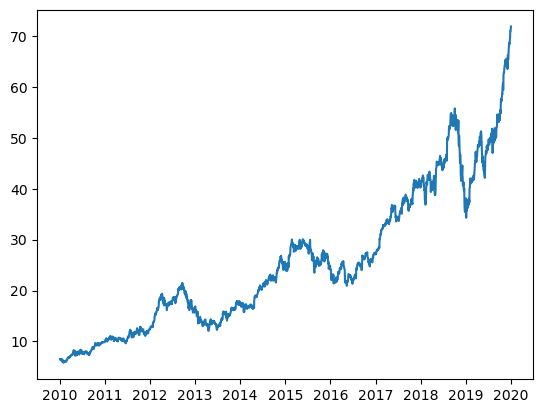

In [6]:
plt.plot(df.Close)

In [7]:
df


,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,71.00840,71.92460,70.90770,71.91760,1.030855e+08
2019-12-30,70.89380,71.68640,69.85490,71.39830,1.472306e+08
2019-12-27,71.30150,71.99740,70.56470,70.97550,1.494081e+08
2019-12-26,69.75920,71.02140,69.73030,71.00340,9.527219e+07
2019-12-24,69.72730,69.77620,69.29070,69.62260,4.948450e+07
...,...,...,...,...,...
2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08
2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2019-12-31         NaN
2019-12-30         NaN
2019-12-27         NaN
2019-12-26         NaN
2019-12-24         NaN
                ...   
2010-01-08    6.953343
2010-01-07    6.937091
2010-01-06    6.921914
2010-01-05    6.908978
2010-01-04    6.897006
Name: Close, Length: 2516, dtype: float64

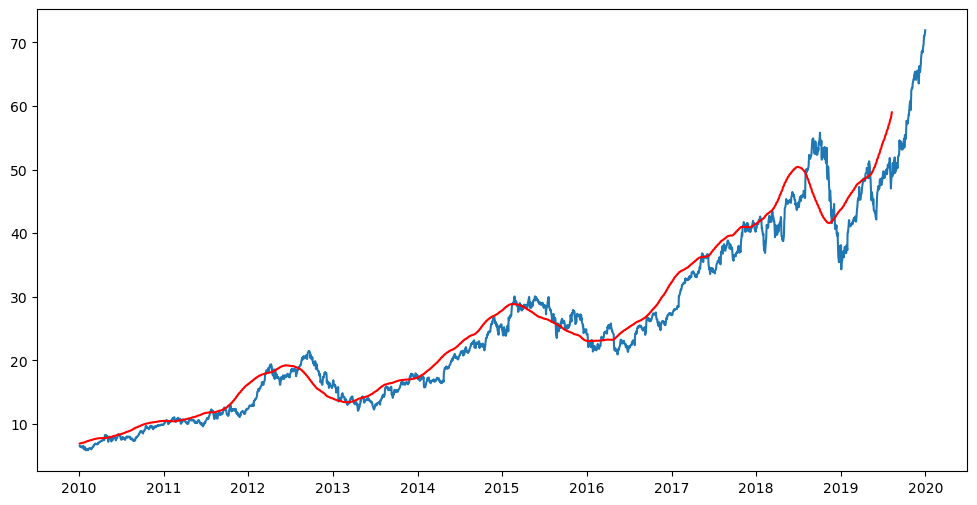

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

Date
2019-12-31         NaN
2019-12-30         NaN
2019-12-27         NaN
2019-12-26         NaN
2019-12-24         NaN
                ...   
2010-01-08    7.532251
2010-01-07    7.517503
2010-01-06    7.502498
2010-01-05    7.487859
2010-01-04    7.473319
Name: Close, Length: 2516, dtype: float64

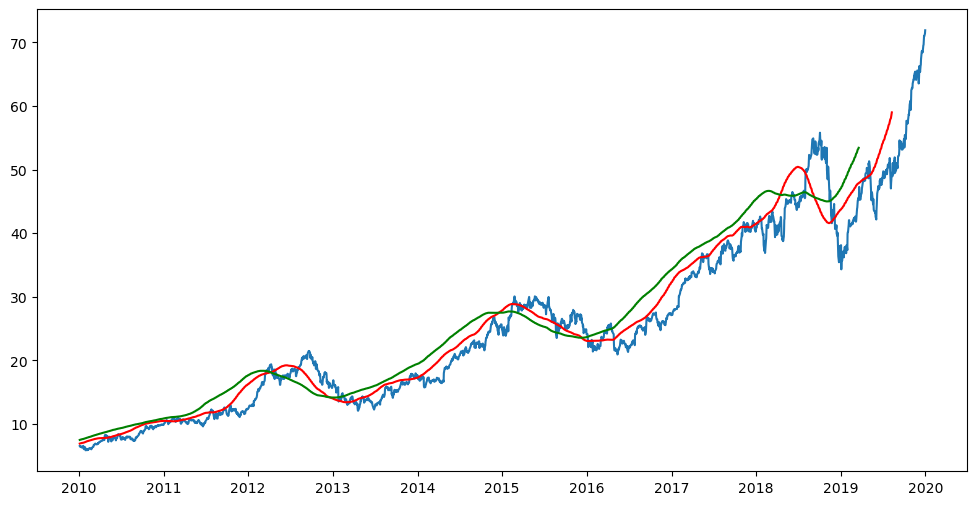

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(2516, 5)

In [13]:
#spltting data in training and testing 

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1761, 1)
(755, 1)


In [14]:
data_training.head()

,Close
Date,
2019-12-31,71.9176
2019-12-30,71.3983
2019-12-27,70.9755
2019-12-26,71.0034
2019-12-24,69.6226


In [15]:
data_testing.head()

,Close
Date,
2013-01-02,16.8635
2012-12-31,16.3442
2012-12-28,15.6512
2012-12-27,15.8198
2012-12-26,15.7560


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[1.        ],
       [0.9913238 ],
       [0.98425987],
       ...,
       [0.06725934],
       [0.06889166],
       [0.07662054]])

In [18]:
data_training_array.shape



(1761, 1)

In [19]:
x_train =[]
y_train =[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
    
                   
                   
                   

In [20]:
x_train.shape


(1661, 100, 1)

In [21]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [22]:
!pip install pandas_datareader


In [23]:
!pip install keras


In [24]:
!pip install tensorflow

In [25]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True)),
model.add(Dropout(0.4))

               
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
model.compile(optimizer='adam', loss = 'mean_squared_error')



In [28]:

model.fit(x_train, y_train, epochs = 50 )

Epoch 1/50
52/52 [==============================] - 17s 195ms/step - loss: 0.0274
Epoch 2/50
52/52 [==============================] - 10s 187ms/step - loss: 0.0051
Epoch 3/50
52/52 [==============================] - 10s 189ms/step - loss: 0.0045
Epoch 4/50
52/52 [==============================] - 10s 193ms/step - loss: 0.0037
Epoch 5/50
52/52 [==============================] - 9s 181ms/step - loss: 0.0038
Epoch 6/50
52/52 [==============================] - 10s 188ms/step - loss: 0.0037
Epoch 7/50
52/52 [==============================] - 9s 177ms/step - loss: 0.0033
Epoch 8/50
52/52 [==============================] - 9s 179ms/step - loss: 0.0034
Epoch 9/50
52/52 [==============================] - 9s 179ms/step - loss: 0.0028
Epoch 10/50
52/52 [==============================] - 10s 188ms/step - loss: 0.0024
Epoch 11/50
37/52 [====================>.........] - ETA: 2s - loss: 0.0026

KeyboardInterrupt: 

In [ ]:
model.save('keras_model.h5')


In [ ]:
data_testing.head()

In [30]:
past_100_days = data_training.tail(100)


In [31]:
final_df = past_100_days.concat(data_testing, ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'concat'

In [45]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [47]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [49]:
input_data.shape


(856, 1)

In [50]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [51]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [52]:
#making predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 3s 46ms/step


In [53]:
y_predicted.shape

(756, 1)

In [54]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [55]:
y_predicted


array([[0.13236807],
       [0.13253796],
       [0.13271786],
       [0.1329045 ],
       [0.13309434],
       [0.13328405],
       [0.13347092],
       [0.13365322],
       [0.13383031],
       [0.13400237],
       [0.1341702 ],
       [0.13433465],
       [0.1344969 ],
       [0.1346584 ],
       [0.13482034],
       [0.13498375],
       [0.13514942],
       [0.13531777],
       [0.13549031],
       [0.13566959],
       [0.13585868],
       [0.13606031],
       [0.13627616],
       [0.13651648],
       [0.13679871],
       [0.13714463],
       [0.13757831],
       [0.13812408],
       [0.13880432],
       [0.13963756],
       [0.14063594],
       [0.14180595],
       [0.14315034],
       [0.14466825],
       [0.14635435],
       [0.14819893],
       [0.15018934],
       [0.15231049],
       [0.15454416],
       [0.15686882],
       [0.15926135],
       [0.1616979 ],
       [0.16415948],
       [0.16662993],
       [0.16909687],
       [0.17154956],
       [0.17397769],
       [0.176

In [56]:
scaler.scale_

array([0.02099517])

In [59]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

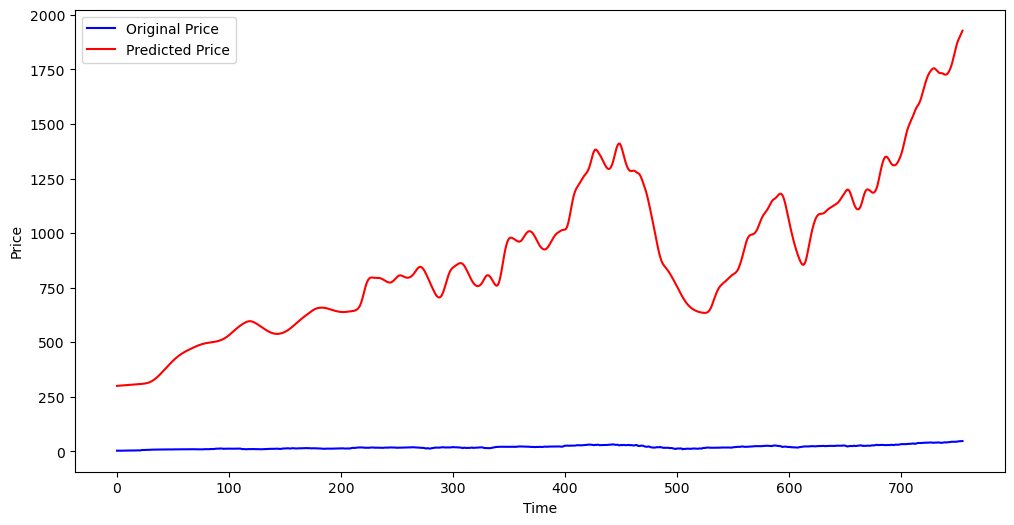

In [63]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show

